Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


Saving testocr.png to testocr (1).png


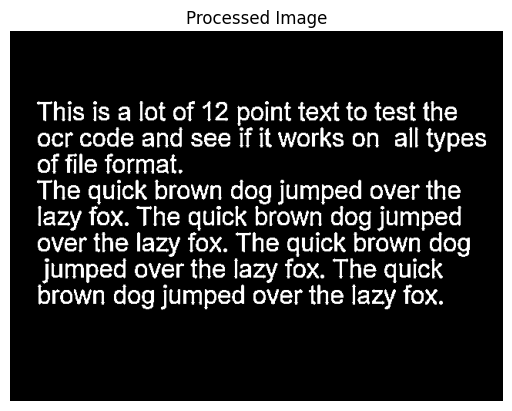

Extracted Text from testocr (1).png:
This is a lot of 12 point text to fest the ocr code and see if it works on all types of file format. The quick brown dog jumped over the lazy fox. The quick brown dog jumped over the lazy fox. The quick brown dog jumped over the lazy fox. The quick brown dog jumped over the lazy fox.
Processing complete. Check the extracted text files.


In [10]:
# Install required packages
!pip install pytesseract opencv-python
!apt-get install tesseract-ocr

# Import libraries
import cv2
import pytesseract
from google.colab import files
import numpy as np
import re
import matplotlib.pyplot as plt

# Upload images
uploaded = files.upload()

# Function to preprocess images
def preprocess_image(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Binarization using adaptive thresholding
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)

    # Deskewing
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]

    # Correcting the angle
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    (h, w) = thresh.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    thresh = cv2.warpAffine(thresh, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    return thresh

# Function to refine text (optional)
def refine_text(text):
    # Simple post-processing: removing unwanted characters and extra spaces
    text = re.sub(r'[^A-Za-z0-9\s.,!?\'"@-]', '', text)  # Keep letters, digits, and common punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip()

# Process each uploaded image
for image_path in uploaded.keys():
    # Read the image
    image = cv2.imread(image_path)

    # Preprocess the image
    processed_image = preprocess_image(image)

    # Display the preprocessed image using Matplotlib
    plt.imshow(processed_image, cmap='gray')
    plt.axis('off')  # Hide axis
    plt.title("Processed Image")
    plt.show()

    # Use Tesseract to extract text
    extracted_text = pytesseract.image_to_string(processed_image)

    # Refine the extracted text
    refined_text = refine_text(extracted_text)

    # Output the refined text
    print(f"Extracted Text from {image_path}:")
    print(refined_text)

    # Optionally, save the output to a text file
    with open(f"{image_path}_extracted.txt", "w") as text_file:
        text_file.write(refined_text)

print("Processing complete. Check the extracted text files.")
